In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

GAMMA = 1
alpha = 0.1
epsilon = 0.1
episodes = 300
runs = 10000
action_num = 10 # the action number from B
actions_left = np.zeros((episodes, 2)) # counts left actions from A

In [3]:
def choose_action(q1, state, q2=None, epsilon=0.1):
    if q2 is None:
        q_value = q1[state]
    else:
        q_value = q1[state] + q2[state]
    assert 1 <= state <= 2
    if np.random.random() < epsilon:
        action = np.random.randint(len(q_value))
    else:
        maxidx = [idx for idx in range(len(q_value)) if q_value[idx]==max(q_value)]
        action = np.random.choice(maxidx)
    return action

def update(q1, state, new_state, action, reward, q2=None, alpha=0.1, gamma=GAMMA):
    if q2 is None:
        q1[state][action] += alpha*(reward + gamma*max(q1[new_state]) - q1[state][action])
    else:
        if np.random.random() < 0.5:
            maxidx = [idx for idx in range(len(q1[new_state])) if q1[new_state][idx]==max(q1[new_state])]
            q1[state][action] += alpha*(reward + gamma*q2[new_state][np.random.choice(maxidx)] - q1[state][action])
        else:
            maxidx = [idx for idx in range(len(q2[new_state])) if q2[new_state][idx]==max(q2[new_state])]
            q2[state][action] += alpha*(reward + gamma*q1[new_state][np.random.choice(maxidx)] - q2[state][action])
    return q1, q2

100%|████████████████████████████████████| 10000/10000 [05:17<00:00, 31.52it/s]


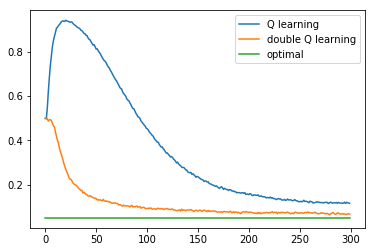

In [4]:
for i in tqdm(range(runs)):
    for method in range(2): # 0 denotes q learning while 2 denotes doulbe q
        # ### two actions for A and many, say 10, for B # ##
        q_value = [np.zeros(1), np.zeros(action_num), np.zeros(2), np.zeros(1)]
        if method:
            qq_value = [np.zeros(1), np.zeros(action_num), np.zeros(2), np.zeros(1)]
        else:
            qq_value = None
        for episode in range(episodes):
            state = 2
            action = choose_action(q1=q_value, state=state, q2=qq_value, epsilon=epsilon) # choose action from A
            if action: # 0 denotes left and 1 denotes right
                new_state = 3
            else:
                new_state = 1
                actions_left[episode, method] += 1
            q_value, qq_value = update(q_value, state, new_state, action, reward=0, q2=qq_value, alpha=alpha)

            state = new_state
            if state == 1:
                action = choose_action(q1=q_value, state=state, q2=qq_value, epsilon=epsilon)
                reward = np.random.normal(loc=-0.1)
                q_value, qq_value = update(q1=q_value, state=state, new_state=0, action=action, reward=reward, q2=qq_value)
            elif state == 3:
                continue
            else:
                raise ValueError('wrong state value!')

actions_left /= runs

plt.plot(range(episodes), actions_left[:, 0], label='Q learning')
plt.plot(range(episodes), actions_left[:, 1], label='double Q learning')
plt.plot(range(episodes), [epsilon/2]*episodes, label='optimal')
plt.legend()
plt.show()